<a href="https://colab.research.google.com/github/e19166/e19-4yp-Dynamic-Multi-Dimensional-Resource-Orchestration-in-Kubernetes/blob/main/results/service2_both_limit_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('service2_both_limit_reduction.csv')
df.head()  # to preview the data

,Timestamp,Service,CPU Request,Memory Request,CPU Limit,Memory Limit,Latency,CPU Usage,Memory Usage
0,2025-05-12T23:29:31.991000,service-2-deployment,0.1,134217728,0.2,268435456,0.000075,0.184294,9920512
1,2025-05-12T23:30:02.206000,service-2-deployment,0.1,134217728,0.2,268435456,0.000075,0.188478,9920512
2,2025-05-12T23:30:32.281000,service-2-deployment,0.1,134217728,0.2,268435456,0.000075,0.186630,9920512
3,2025-05-12T23:31:02.463000,service-2-deployment,0.1,134217728,0.2,268435456,0.000076,0.188611,9920512
4,2025-05-12T23:31:32.562000,service-2-deployment,0.1,134217728,0.2,268435456,0.000076,0.186563,9920512


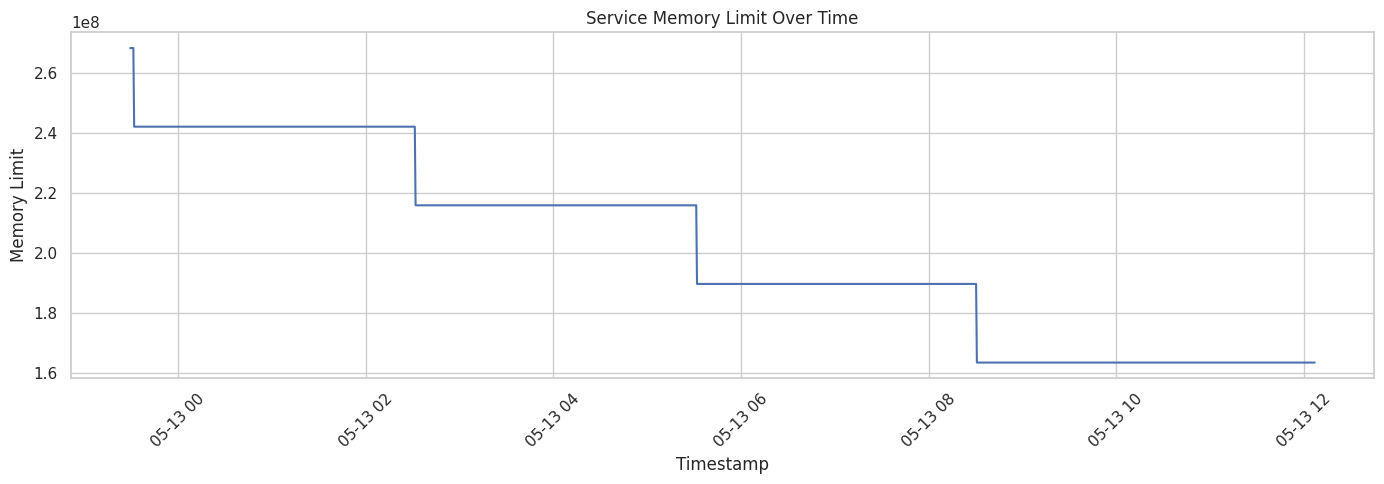

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')


# Set visual style
sns.set(style="whitegrid")

# Plotting functions
def plot_time_series(x, y, ylabel, title):
  plt.figure(figsize=(14, 5))
  sns.lineplot(x=x, y=y)
  plt.ylabel(ylabel)
  plt.xlabel("Timestamp")
  plt.title(title)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

# 1. Latency over time
plot_time_series(df['Timestamp'], df['Memory Limit'], 'Memory Limit', 'Service Memory Limit Over Time')

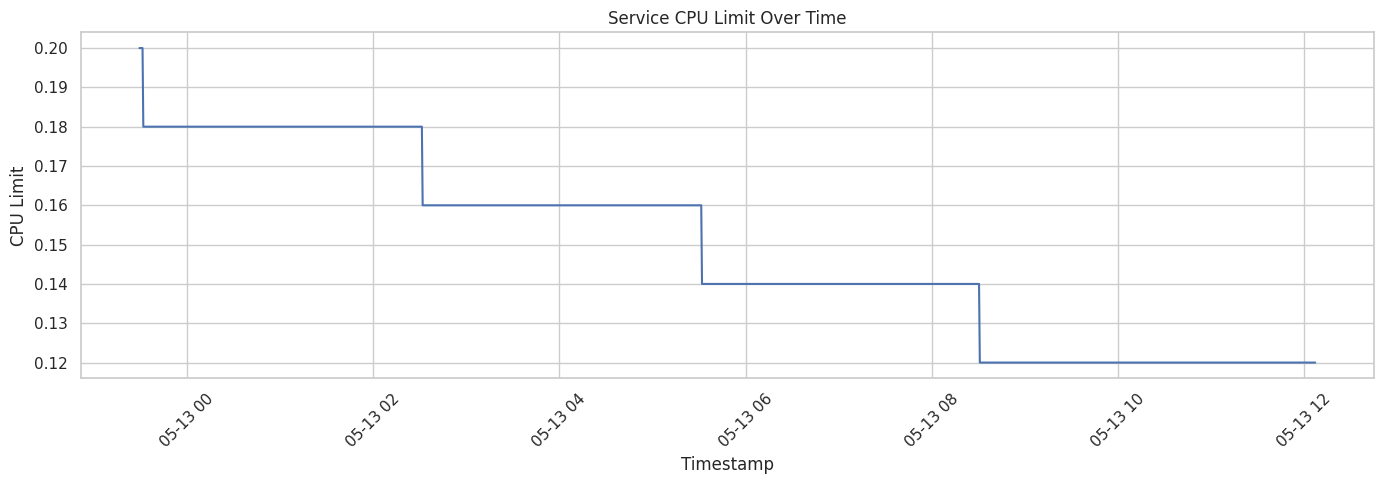

In [3]:
# 1. Latency over time
plot_time_series(df['Timestamp'], df['CPU Limit'], 'CPU Limit', 'Service CPU Limit Over Time')

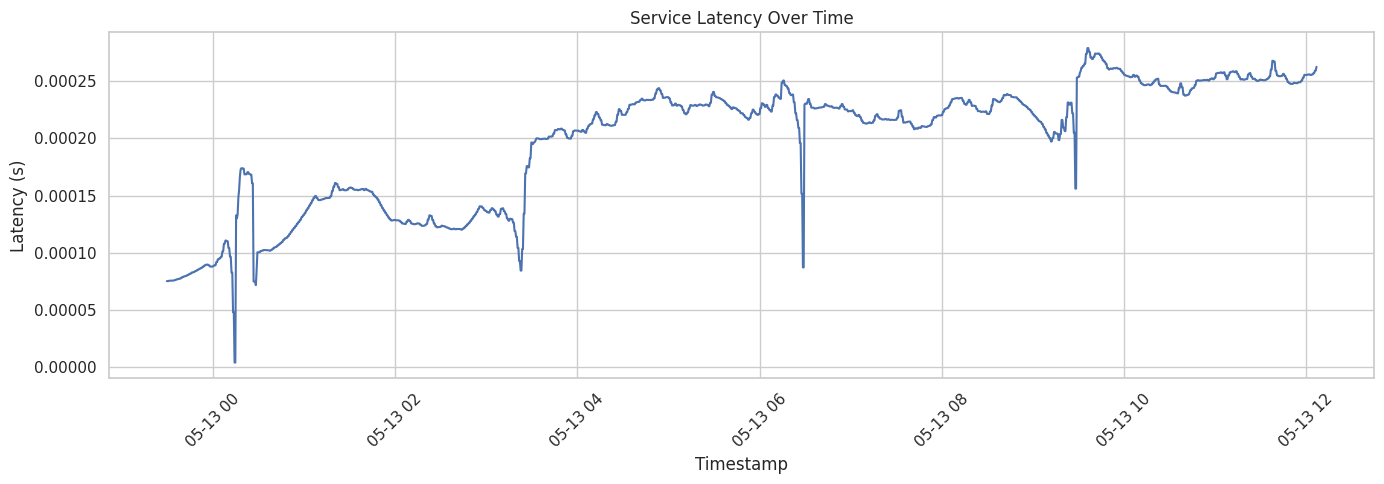

In [4]:
# 1. Latency over time
plot_time_series(df['Timestamp'], df['Latency'], 'Latency (s)', 'Service Latency Over Time')

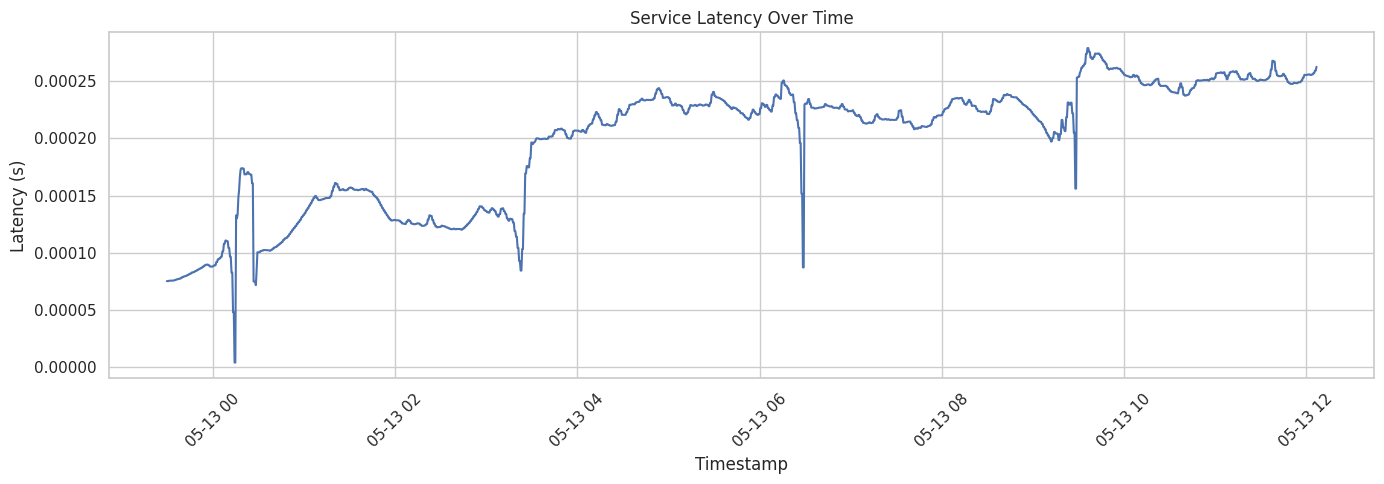

In [5]:
# 1. Latency over time
plot_time_series(df['Timestamp'], df['Latency'], 'Latency (s)', 'Service Latency Over Time')

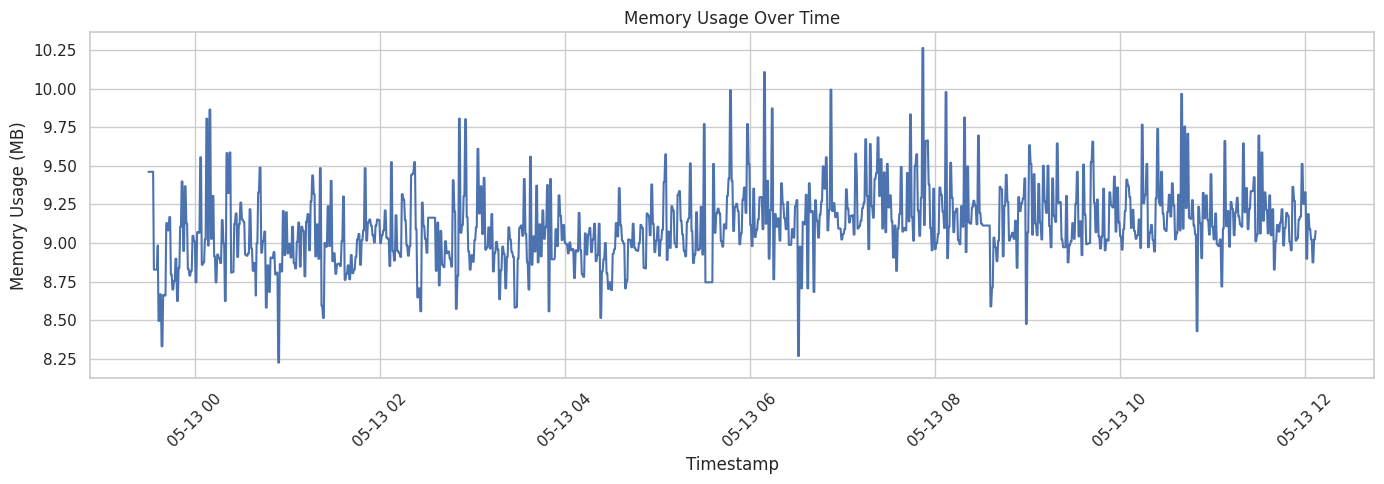

In [6]:
# 3. Memory Usage over time
plot_time_series(df['Timestamp'], df['Memory Usage'] / (1024 ** 2), 'Memory Usage (MB)', 'Memory Usage Over Time')